## Лаб.10

### Применение одномерных сверточных сетей для обработки естественного языка

---

#### Задание:
Познакомиться с приемами применения одномерных сверточных сетей для решения задачи определения тональности текста. Исходные данные – набор отзывов Yelp. Документация набора данных [здесь](https://www.yelp.com/dataset).

[Yelp](https://www.yelp.com/) – это популярный в США сайт, на котором можно оставлять отзывы о различных предприятиях сферы услуг (ресторанах, массажных салонах, автосервисах и др.). В каждом отзыве имеется текст и количество звезд (от 1 до 5). Положительными считаются отзывы с 4 или 5 звездами; негативными – с 1 или 2 звездами.

Набор данных Yelp содержит отзывы с одноименного сайта. В набор включены только явно положительные (5 звезд) и явно негативные (1 звезда) отзывы. Набор содержит 560 тыс. записей в обучающем и 38 тыс. в тестовом множестве.

Требуется построить и обучить модель бинарной классификации тональности текста (положительный/отрицательный).

Отличие от задания лабораторной работы 9: токенизацию и кодирование текстов отзывов нужно будет выполнять самостоятельно (в отличие от набора данных из коллекции `Keras`, где использовался встроенный метод `load_data()`).

**Порядок выполнения работы:**
1. Загрузите архив с отзывами с помощью команды <b>!wget</b><br>Ссылка на архив tar: https://www.dropbox.com/s/fjexugghuawc9rw/yelp_review_polarity_csv.tgz?dl=0 <br>Для загружаемого файла создайте псевдоним `yelp_review_polarity_csv.tgz`<br>В результате выполнения команды среди доступных файлов должен появиться архив `yelp_review_polarity_csv.tgz`
2. Выполните распаковку архива с помощью команды `!tar -xvf  yelp_review_polarity_csv.tgz`<br>Об архивах tar и параметрах распаковки – в [статье А.В. Созыкина](https://github.com/sozykin/asozykin.ru/blob/master/_posts/2019-02-18-Colab-Linux-Commands.md). В этой же статье – о командах Linux, которые будут использоваться в пп. 3 и 4. После выполнения команды <b>!tar</b> должен появиться список файлов, извлеченных из архива.
3. Выведите и изучите содержимое полученных файлов.<br>Вывод содержимого файла полностью – команда <b>!cat</b> (для файла `readme.txt`);<br>Вывод первых 10 строк (с настройкой по умолчанию) – команда <b>!head</b> (для файлов `train.csv` и `test.csv`).<br>Обратите внимание на используемые в наборе метки классов (первый столбец): 1 – негативный, 2 – позитивный.
4. Выведите общее количество записей (отзывов) в файлах `train.csv` и `test.csv` с помощью команды <b>!wc -l</b>
5. Импортируйте содержимое файла `train.csv` в `DataFrame` (команда `pd.read_csv`). В настройках импорта укажите, что заголовки столбцов отсутствуют в файле, и задайте имена заголовков по собственному усмотрению.<br>Выведите несколько первых строк полученного фрейма и проконтролируйте результаты выполнения импорта. 
6. Сохраните в виде отдельных объектов `reviews` и `y_train` соответственно тексты отзывов и метки классов. Для обозначения классов используйте метки 0 и 1 (чтобы для классификации можно было использовать полносвязный слой с сигмоидной функцией активации).
7. Задайте значения константам `num_words = 10000` (максимальное количество слов, которое будет обрабатываться – размерность словаря) и `max_len = 100` (максимальное количество обрабатываемых слов для каждого отзыва).
8. Выполните токенизацию текста – разбиение текста на токены и создание их числового представления. В данном случае токены – отдельные слова.
  * Создайте токенизатор (экземляр класса [Tokenizer](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer)), указав максимальное число слов для анализа равным `num_words`. Класс нужно импортировать из `tensorflow.keras.preprocessing.text`.
  * Обучите токенизатор на текстах из `reviews`, применив метод `fit_on_texts()`.
  * Выведите и изучите созданный токенизатором частотный словарь (для этого используйте атрибут `word_index` токенизатора).
  * С помощью обученного токенизатора получите числовые представления текстов отзывов:<br>`sequences = <имя токенизатора>.texts_to_sequences(reviews)`.
  * Выведите (для ознакомления и контроля) текст произвольного отзыва (элемент `reviews` с конкретным индексом) и его числовое представление (элемент `sequences` с этим же индексом); сопоставьте числовое представление с полученным ранее словарем (номер слова в словаре – `<имя токенизатора>.word_index[<слово>]`).
  * Выведите длину числовых представлений нескольких отзывов (элементов `sequences`) и убедитесь, что полученные последовательности имеют разную длину.
  * Реализуйте приведение всех числовых представлений к одной длине с помощью функции `pad_sequences()`:<br>`from tensorflow.keras.preprocessing.sequence import pad_sequences`<br>`x_train = pad_sequences(sequences, maxlen=max_len)`<br>Выведите размерность полученного массива и первые 5 его элементов и обратите внимание на появившиеся нулевые элементы.
9. Создайте модель `Sequential` и добавьте следующие слои:
  * `Embedding(num_words, 64, input_length=max_len)`
  * `Conv1D(250, 5, padding='valid', activation='relu')`<br>содержит 250 ядер свертки размерности 5
  * `GlobalMaxPooling1D()`
  * `Dense(128, activation='relu')`<br>слой классификации
  * `Dropout(0.2)`
  * `Dense(1, activation='sigmoid')`
10. Скомпилируйте ИНС, задав алгоритм обучения `adam`, функцию потерь `binary_crossentropy` и метрику качества `accuracy`. Выведите информацию об архитектуре и количестве параметров созданной ИНС.
11. Обучите ИНС, определив 4 эпохи обучения, `batch_size=128`, `validation_split=0.1`, сохранив историю процесса обучения.
12. Постройте график изменения метрики `accuracy` на обучающем и проверочном наборах. 
13. Оцените качество обученной модели на тестовом наборе данных:
  * импортируйте содержимое файла `test.csv` в DataFrame;
  * получите числовые представления отзывов тестового набора, применив <u>к обученному на обучающем наборе</u> токенизатору метод `texts_to_sequences()`;
  * приведите числовые представления всех отзывов к одной длине с помощью функции `pad_sequences()`;
  * сформируйте набор меток классов `y_test`;
  * выполните оценку качества обученной модели на подготовленных тестовых данных.
14. Примените обученную модель для оценки тональности произвольного текста.
  * Создайте строку `text`, содержащую текст некоторого отзыва на английском языке: можно написать свой собственный текст или взять готовый пример текста отзыва.<br><u>Например</u>: «The SmartBurger restaurant is awful. It’s a small shabby place. The food is really bad and very expensive. The host and waiters are rude. I will never visit the SmartBurger again!».
  * Получите числовое представление отзыва, применив к обученному на обучающем наборе токенизатору метод `texts_to_sequences()`. Обратите внимание: аргумент метода должен быть списком/массивом, а не строкой!
  * Примените к полученной последовательности функцию `pad_sequences()`, тем самым обеспечив нужную размерность.
  * Оцените вероятность принадлежности отзыва классу 1 (положительных) с помощью метода `predict()`.
15. Поэкспериментируйте с гиперпараметрами моделей для получения наилучших результатов. Можно менять:
  * размерность окна свертки: 3, 5, 7, 9;
  * количество сверток в сверточном слое;
  * длину векторного представления в слое `Embedding`;
  * количество сверточных слоев;
  * количество нейронов в полносвязном слое классификации;
  * параметр `Dropout`;
  * тип оптимизатора;
  * параметр `batch_size`;
  * количество эпох обучения.

---

1. Загрузите архив с отзывами с помощью команды <b>!wget</b><br>Ссылка на архив tar: https://www.dropbox.com/s/fjexugghuawc9rw/yelp_review_polarity_csv.tgz?dl=0 <br>Для загружаемого файла создайте псевдоним `yelp_review_polarity_csv.tgz`<br>В результате выполнения команды среди доступных файлов должен появиться архив `yelp_review_polarity_csv.tgz`

In [ ]:
# download the archive with reviews using the !wget command

!wget https://www.dropbox.com/s/fjexugghuawc9rw/yelp_review_polarity_csv.tgz?dl=0

--2022-12-13 14:43:29--  https://www.dropbox.com/s/fjexugghuawc9rw/yelp_review_polarity_csv.tgz?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.64.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.64.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/fjexugghuawc9rw/yelp_review_polarity_csv.tgz [following]
--2022-12-13 14:43:30--  https://www.dropbox.com/s/raw/fjexugghuawc9rw/yelp_review_polarity_csv.tgz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc23b9c4ede800eb6da73d229312.dl.dropboxusercontent.com/cd/0/inline/ByiilDmAKtwSiIBlQ8ndc_s1TIUEqO-cBGwWy8R1eo2d_PfIkI2OsxrP6BBbmleBtnv9tRVX7ToPKuGVyJJkte1JC_ypBuaLsvy5raX7JvnmjLEr1ko5frBw0PuPG_MfBnRQrkB-xGyFt6p03Tl3XJLe2M3WEFBtb7ZNEwMoEP8Upg/file# [following]
--2022-12-13 14:43:31--  https://uc23b9c4ede800eb6da73d229312.dl.dropboxusercontent.com/cd/0/inline/ByiilDmAKtwSiIBlQ8ndc_s1

In [ ]:
!mv yelp_review_polarity_csv.tgz?dl=0 yelp_review_polarity_csv.tgz

---

2. Выполните распаковку архива с помощью команды `!tar -xvf  yelp_review_polarity_csv.tgz`<br>Об архивах tar и параметрах распаковки – в [статье А.В. Созыкина](https://github.com/sozykin/asozykin.ru/blob/master/_posts/2019-02-18-Colab-Linux-Commands.md). В этой же статье – о командах Linux, которые будут использоваться в пп. 3 и 4. После выполнения команды <b>!tar</b> должен появиться список файлов, извлеченных из архива.

In [ ]:
# unzip the archive with the command !tar

!tar -xvf yelp_review_polarity_csv.tgz

yelp_review_polarity_csv/
yelp_review_polarity_csv/train.csv
yelp_review_polarity_csv/readme.txt
yelp_review_polarity_csv/test.csv


---

3. Выведите и изучите содержимое полученных файлов.<br>Вывод содержимого файла полностью – команда <b>!cat</b> (для файла `readme.txt`);<br>Вывод первых 10 строк (с настройкой по умолчанию) – команда <b>!head</b> (для файлов `train.csv` и `test.csv`).<br>Обратите внимание на используемые в наборе метки классов (первый столбец): 1 – негативный, 2 – позитивный.

In [ ]:
# output and examine the contents of the received files

# display the contents of the file in full - the !cat command (for the readme.txt file)
!cat yelp_review_polarity_csv/readme.txt

Yelp Review Polarity Dataset

Version 1, Updated 09/09/2015

ORIGIN

The Yelp reviews dataset consists of reviews from Yelp. It is extracted from the Yelp Dataset Challenge 2015 data. For more information, please refer to http://www.yelp.com/dataset_challenge

The Yelp reviews polarity dataset is constructed by Xiang Zhang (xiang.zhang@nyu.edu) from the above dataset. It is first used as a text classification benchmark in the following paper: Xiang Zhang, Junbo Zhao, Yann LeCun. Character-level Convolutional Networks for Text Classification. Advances in Neural Information Processing Systems 28 (NIPS 2015).


DESCRIPTION

The Yelp reviews polarity dataset is constructed by considering stars 1 and 2 negative, and 3 and 4 positive. For each polarity 280,000 training samples and 19,000 testing samples are take randomly. In total there are 560,000 trainig samples and 38,000 testing samples. Negative polarity is class 1, and positive class 2.

The files train.csv and test.csv contain all the

In [ ]:
# output first 10 lines (with default setting) - !head command (for train.csv)
!head yelp_review_polarity_csv/train.csv

# pay attention to the class labels used in the set (first column): 1 - negative, 2 - positive

"1","Unfortunately, the frustration of being Dr. Goldberg's patient is a repeat of the experience I've had with so many other doctors in NYC -- good doctor, terrible staff.  It seems that his staff simply never answers the phone.  It usually takes 2 hours of repeated calling to get an answer.  Who has time for that or wants to deal with it?  I have run into this problem with many other doctors and I just don't get it.  You have office workers, you have patients with medical needs, why isn't anyone answering the phone?  It's incomprehensible and not work the aggravation.  It's with regret that I feel that I have to give Dr. Goldberg 2 stars."
"2","Been going to Dr. Goldberg for over 10 years. I think I was one of his 1st patients when he started at MHMG. He's been great over the years and is really all about the big picture. It is because of him, not my now former gyn Dr. Markoff, that I found out I have fibroids. He explores all options with you and is very patient and understanding. H

In [ ]:
# output first 10 lines (with default setting) - !head command (for test.csv)
!head yelp_review_polarity_csv/test.csv

# pay attention to the class labels used in the set (first column): 1 - negative, 2 - positive

"2","Contrary to other reviews, I have zero complaints about the service or the prices. I have been getting tire service here for the past 5 years now, and compared to my experience with places like Pep Boys, these guys are experienced and know what they're doing. \nAlso, this is one place that I do not feel like I am being taken advantage of, just because of my gender. Other auto mechanics have been notorious for capitalizing on my ignorance of cars, and have sucked my bank account dry. But here, my service and road coverage has all been well explained - and let up to me to decide. \nAnd they just renovated the waiting room. It looks a lot better than it did in previous years."
"1","Last summer I had an appointment to get new tires and had to wait a super long time. I also went in this week for them to fix a minor problem with a tire they put on. They \""fixed\"" it for free, and the very next morning I had the same issue. I called to complain, and the \""manager\"" didn't even apolog

---

4. Выведите общее количество записей (отзывов) в файлах `train.csv` и `test.csv` с помощью команды <b>!wc -l</b>

In [ ]:
# print the total number of records (reviews) in the train.csv using the !wc -l command

!wc -l yelp_review_polarity_csv/train.csv

560000 yelp_review_polarity_csv/train.csv


In [ ]:
# print the total number of records (reviews) in the test.csv using the !wc -l command

!wc -l yelp_review_polarity_csv/test.csv

38000 yelp_review_polarity_csv/test.csv


---

5. Импортируйте содержимое файла `train.csv` в `DataFrame` (команда `pd.read_csv`). В настройках импорта укажите, что заголовки столбцов отсутствуют в файле, и задайте имена заголовков по собственному усмотрению.<br>Выведите несколько первых строк полученного фрейма и проконтролируйте результаты выполнения импорта.

In [ ]:
# import the contents of the train.csv file into a DataFrame (pd.read_csv command)
# specify in the import settings that no column headings are present in the file, and give the heading names as you wish

import pandas as pd
from pprint import pprint

df = pd.read_csv('yelp_review_polarity_csv/train.csv', header=None, names=['label', 'text'])
df.head()

,label,text
0,1,"Unfortunately, the frustration of being Dr. Go..."
1,2,Been going to Dr. Goldberg for over 10 years. ...
2,1,I don't know what Dr. Goldberg was like before...
3,1,I'm writing this review to give you a heads up...
4,2,All the food is great here. But the best thing...


---

6. Сохраните в виде отдельных объектов `reviews` и `y_train` соответственно тексты отзывов и метки классов. Для обозначения классов используйте метки 0 и 1 (чтобы для классификации можно было использовать полносвязный слой с сигмоидной функцией активации).

In [ ]:
# save the reviews texts and class labels as separate reviews and y_train objects, respectively. use labels 0 and 1 to label classes

reviews = df['text'].values
y_train = df['label'].values - 1  # use labels 0 and 1 to label classes

---

7. Задайте значения константам `num_words = 10000` (максимальное количество слов, которое будет обрабатываться – размерность словаря) и `max_len = 100` (максимальное количество обрабатываемых слов для каждого отзыва).

In [ ]:
# set the constants num_words = 10000 (the maximum number of words to be processed - the dimension of the dictionary)
# and max_len = 100 (the maximum number of words to be processed for each review)

num_words = 10000
max_len = 100

---

8. Выполните токенизацию текста – разбиение текста на токены и создание их числового представления. В данном случае токены – отдельные слова.
  * Создайте токенизатор (экземляр класса [Tokenizer](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer)), указав максимальное число слов для анализа равным `num_words`. Класс нужно импортировать из `tensorflow.keras.preprocessing.text`.
  * Обучите токенизатор на текстах из `reviews`, применив метод `fit_on_texts()`.
  * Выведите и изучите созданный токенизатором частотный словарь (для этого используйте атрибут `word_index` токенизатора).
  * С помощью обученного токенизатора получите числовые представления текстов отзывов:<br>`sequences = <имя токенизатора>.texts_to_sequences(reviews)`.
  * Выведите (для ознакомления и контроля) текст произвольного отзыва (элемент `reviews` с конкретным индексом) и его числовое представление (элемент `sequences` с этим же индексом); сопоставьте числовое представление с полученным ранее словарем (номер слова в словаре – `<имя токенизатора>.word_index[<слово>]`).
  * Выведите длину числовых представлений нескольких отзывов (элементов `sequences`) и убедитесь, что полученные последовательности имеют разную длину.
  * Реализуйте приведение всех числовых представлений к одной длине с помощью функции `pad_sequences()`:<br>`from tensorflow.keras.preprocessing.sequence import pad_sequences`<br>`x_train = pad_sequences(sequences, maxlen=max_len)`<br>Выведите размерность полученного массива и первые 5 его элементов и обратите внимание на появившиеся нулевые элементы.

In [ ]:
# perform text tokenization by splitting text into tokens and creating their numerical representation, in this case, tokens are separate words

# create a tokenizer (an instance of the Tokenizer class), specifying the maximum number of words to parse equal to num_words
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=num_words)

# train the tokenizer on texts from reviews using the fit_on_texts() method
tokenizer.fit_on_texts(reviews)

# display and examine the frequency dictionary created by the tokenizer (for this, use the word_index attribute of the tokenizer)
pprint(tokenizer.word_index)

# using the trained tokenizer, get numerical representations of the texts of reviews: sequences = <tokenizer name>.texts_to_sequences(reviews)
sequences = tokenizer.texts_to_sequences(reviews)

pprint(sequences[0])

Streaming output truncated to the last 5000 lines.
 'woooooohoo': 210804,
 'woooooohooooo': 218693,
 'wooooooo': 115713,
 'woooooooaaah': 158866,
 'woooooooo': 110449,
 'wooooooooo': 88362,
 'wooooooooohoo': 203263,
 'woooooooooo': 89443,
 'woooooooooohhhhhhhhh': 188218,
 'wooooooooooo': 110450,
 'wooooooooooohooooooooooooooooo': 190085,
 'wooooooooooooooooooooooow': 162740,
 'woooooooooooooooooooooowwwwwwwwwwwwwwwwwwwww': 141239,
 'wooooooooooooowwwwwww': 155517,
 'woooooooooooossssssssssh': 231039,
 'woooooooooow': 246952,
 'wooooooooow': 102832,
 'woooooooowwwww': 247404,
 'woooooooowwwwww': 238428,
 'wooooooot': 202828,
 'wooooooow': 121993,
 'woooooorrrrssstttttttt': 245125,
 'woooooow': 94542,
 'wooooooweee': 137805,
 'wooooop': 93911,
 'wooooot': 107744,
 'wooooow': 61175,
 'woooooweeee': 190252,
 'woooorst': 172998,
 'woooow': 75991,
 'woooowee': 235501,
 'woooowwww': 109414,
 'wooops': 234867,
 'wooorrrrsstttt': 197570,
 'wooorst': 166242,
 'wooorth': 207310,
 'wooos': 215687,

In [ ]:
# output (for review and control) the text of an arbitrary review (the reviews element with a specific index) 
# and its numeric representation (the sequences element with the same index); match the numeric representation
# with previously obtained dictionary (the number of word in dictionary is <tokenizer name>.word_index[<word>])

pprint(reviews[0])
pprint(sequences[0])

# print the length of the numeric representations of several responses (elements 
# of sequences) and make sure that the resulting sequences have different lengths

print(len(sequences[0]))
print(len(sequences[1]))

("Unfortunately, the frustration of being Dr. Goldberg's patient is a repeat "
 "of the experience I've had with so many other doctors in NYC -- good doctor, "
 'terrible staff.  It seems that his staff simply never answers the phone.  It '
 'usually takes 2 hours of repeated calling to get an answer.  Who has time '
 'for that or wants to deal with it?  I have run into this problem with many '
 "other doctors and I just don't get it.  You have office workers, you have "
 "patients with medical needs, why isn't anyone answering the phone?  It's "
 "incomprehensible and not work the aggravation.  It's with regret that I feel "
 'that I have to give Dr. Goldberg 2 stars.')
[707,
 1,
 4339,
 7,
 173,
 939,
 1665,
 11,
 5,
 2161,
 7,
 1,
 137,
 112,
 24,
 18,
 27,
 189,
 80,
 3128,
 10,
 2636,
 34,
 1416,
 462,
 129,
 8,
 519,
 13,
 177,
 129,
 803,
 88,
 3812,
 1,
 446,
 8,
 392,
 841,
 115,
 360,
 7,
 4136,
 1438,
 4,
 43,
 59,
 1266,
 118,
 95,
 46,
 9,
 13,
 49,
 1687,
 4,
 418,
 18,
 

In [ ]:
# implement coercion of all numeric representations to the same length using the pad_sequences() function

from tensorflow.keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(sequences, maxlen=max_len)
pprint(x_train.shape)
pprint(x_train[0])

(560000, 100)
array([   7,    1,  137,  112,   24,   18,   27,  189,   80, 3128,   10,
       2636,   34, 1416,  462,  129,    8,  519,   13,  177,  129,  803,
         88, 3812,    1,  446,    8,  392,  841,  115,  360,    7, 4136,
       1438,    4,   43,   59, 1266,  118,   95,   46,    9,   13,   49,
       1687,    4,  418,   18,    8,    3,   23,  563,  178,   16,  460,
         18,  189,   80, 3128,    2,    3,   40,   78,   43,    8,   20,
         23,  644, 1343,   20,   23, 3252,   18, 2921,  637,  227,  430,
        476, 4312,    1,  446,   63,    2,   22,  215,    1,   63,   18,
       2269,   13,    3,  249,   13,    3,   23,    4,  163,  939,  115,
        237], dtype=int32)


---

9. Создайте модель `Sequential` и добавьте следующие слои:
  * `Embedding(num_words, 64, input_length=max_len)`
  * `Conv1D(250, 5, padding='valid', activation='relu')`<br>содержит 250 ядер свертки размерности 5
  * `GlobalMaxPooling1D()`
  * `Dense(128, activation='relu')`<br>слой классификации
  * `Dropout(0.2)`
  * `Dense(1, activation='sigmoid')`

In [ ]:
# create a Sequential model and add the following layers:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Embedding, Conv1D, GlobalMaxPooling1D

model = Sequential()
model.add(Embedding(num_words, 64, input_length=max_len))
model.add(Conv1D(250, 5, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

---

10. Скомпилируйте ИНС, задав алгоритм обучения `adam`, функцию потерь `binary_crossentropy` и метрику качества `accuracy`. Выведите информацию об архитектуре и количестве параметров созданной ИНС.

In [ ]:
# compile the ANN by specifying the adam learning algorithm, the binary_crossentropy loss function, and the 
# quality metric accuracy. output information about architecture and number of parameters of the created ANN

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           640000    
                                                                 
 conv1d (Conv1D)             (None, 96, 250)           80250     
                                                                 
 global_max_pooling1d (Globa  (None, 250)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 128)               32128     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                        

---

11. Обучите ИНС, определив 4 эпохи обучения, `batch_size=128`, `validation_split=0.1`, сохранив историю процесса обучения.

In [ ]:
# train the ANN by defining 4 training epochs, batch_size=128, validation_split=0.1, keeping the history of the training process

history = model.fit(x_train, y_train, epochs=4, batch_size=128, validation_split=0.1)

Epoch 1/4
3938/3938 [==============================] - 29s 7ms/step - loss: 0.1862 - accuracy: 0.9244 - val_loss: 0.1476 - val_accuracy: 0.9410
Epoch 2/4
3938/3938 [==============================] - 25s 6ms/step - loss: 0.1243 - accuracy: 0.9534 - val_loss: 0.1140 - val_accuracy: 0.9562
Epoch 3/4
3938/3938 [==============================] - 25s 6ms/step - loss: 0.0894 - accuracy: 0.9677 - val_loss: 0.1235 - val_accuracy: 0.9546
Epoch 4/4
3938/3938 [==============================] - 25s 6ms/step - loss: 0.0592 - accuracy: 0.9793 - val_loss: 0.1538 - val_accuracy: 0.9478


---

12. Постройте график изменения метрики `accuracy` на обучающем и проверочном наборах.

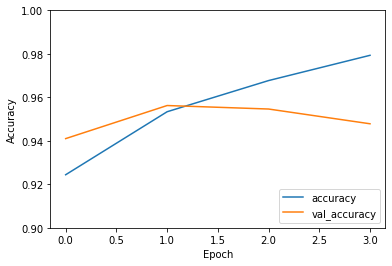

In [ ]:
# plot the change in the accuracy metric on the training and testing sets

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')
plt.show();

---

13. Оцените качество обученной модели на тестовом наборе данных:
  * импортируйте содержимое файла `test.csv` в DataFrame;
  * получите числовые представления отзывов тестового набора, применив <u>к обученному на обучающем наборе</u> токенизатору метод `texts_to_sequences()`;
  * приведите числовые представления всех отзывов к одной длине с помощью функции `pad_sequences()`;
  * сформируйте набор меток классов `y_test`;
  * выполните оценку качества обученной модели на подготовленных тестовых данных.

In [ ]:
# evaluate the quality of the trained model on the test dataset:

df_test = pd.read_csv('yelp_review_polarity_csv/test.csv', header=None, names=['label', 'text'])
reviews_test = df_test['text'].values
y_test = df_test['label'].values - 1  # use labels 0 and 1 to label classes
sequences_test = tokenizer.texts_to_sequences(reviews_test)
x_test = pad_sequences(sequences_test, maxlen=max_len)
model.evaluate(x_test, y_test)

1188/1188 [==============================] - 3s 3ms/step - loss: 0.1897 - accuracy: 0.9352


[0.18965287506580353, 0.9351841807365417]

---

14. Примените обученную модель для оценки тональности произвольного текста.
  * Создайте строку `text`, содержащую текст некоторого отзыва на английском языке: можно написать свой собственный текст или взять готовый пример текста отзыва.<br><u>Например</u>: «The SmartBurger restaurant is awful. It’s a small shabby place. The food is really bad and very expensive. The host and waiters are rude. I will never visit the SmartBurger again!».
  * Получите числовое представление отзыва, применив к обученному на обучающем наборе токенизатору метод `texts_to_sequences()`. Обратите внимание: аргумент метода должен быть списком/массивом, а не строкой!
  * Примените к полученной последовательности функцию `pad_sequences()`, тем самым обеспечив нужную размерность.
  * Оцените вероятность принадлежности отзыва классу 1 (положительных) с помощью метода `predict()`.

In [ ]:
# apply the trained model to evaluate the sentiment of an arbitrary text

text = "The SmartBurger restaurant is awful. It's a small shabby place. The food is really bad and very expensive. The host and waiters are rud. I will never visit the SmartBurger again!"

sequence = tokenizer.texts_to_sequences([text])
x = pad_sequences(sequence, maxlen=max_len)
model.predict(x)

1/1 [==============================] - 0s 14ms/step


array([[3.2385356e-07]], dtype=float32)